In [105]:
import pyfiglet as pyf
print(pyf.figlet_format('Kelompok - 3'))
print('''
NAMA KELOMPOK : 1. Talitha Rahmadewati W (1206220022)
                2. Alfi Purwaningrum (1206220031)
                3. Helga Fadhil R (1206220043)
''')
print(pyf.figlet_format('---------'))

 _  __    _                             _              _____ 
| |/ /___| | ___  _ __ ___  _ __   ___ | | __         |___ / 
| ' // _ \ |/ _ \| '_ ` _ \| '_ \ / _ \| |/ /  _____    |_ \ 
| . \  __/ | (_) | | | | | | |_) | (_) |   <  |_____|  ___) |
|_|\_\___|_|\___/|_| |_| |_| .__/ \___/|_|\_\         |____/ 
                           |_|                               


NAMA KELOMPOK : 1. Talitha Rahmadewati W (1206220022)
                2. Alfi Purwaningrum (1206220031)
                3. Helga Fadhil R (1206220043)

                                                       
                                                       
 _____ _____ _____ _____ _____ _____ _____ _____ _____ 
|_____|_____|_____|_____|_____|_____|_____|_____|_____|
                                                       
                                                       



# LATAR BELAKANG
Kesehatan merupakan salah satu indikator penting dalam mengukur kesejahteraan masyarakat. Provinsi Jawa Tengah memiliki jumlah penduduk yang besar, yaitu sekitar 34,5 juta jiwa. walaupun secara umum, kondisi dunia kesehatan Jawa Tengah di tahun 2018 hingga 2021 menunjukkan tren yang positif. Namun, masih terdapat berbagai masalah diantaranya kesenjangan akses pelayanan kesehatan di antara masyarakat kabupaten/kota, pemerataan jaminan kesehatan dan selain itu, masih terdapat beberapa masalah kesehatan yang perlu ditangani. Sehingga diperlukan analisis yang komprehensif untuk mengidentifikasi permasalahan dan potensi yang ada di Provinsi Jawa Tengah.

# GOALS:
Meningkatkan Sistem Kesehatan Yang Merata dan Berkelanjutan Dalam Upaya Mencapai Kesejahteraan Masyarakat Provinsi Jawa Tengah.

# RUMUSAN MASALAH:
1. Bagaimana perbandingan serta persebaran fasilitas kesehatan dan tenaga kesehatan di provinsi Jawa Tengah?
2. Apakah jumlah kasus penyakit di provinsi jawa tengah sudah menurun?
3. Apakah terdapat peningkatan penduduk yang memiliki jaminan kesehatan di setiap tahunnya?
4. Bagaimana tingkat partisipasi dalam program jaminan kesehatan di berbagai wilayah jawa tengah??

# Link Dataset:
https://github.com/talitharhmd/data-kelompok3-sdgs3-eda

In [21]:
import warnings
warnings.filterwarnings("ignore")

In [22]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1. PENGUMPULAN DATA & PRE-PROCESSING
data yang kami kumpulkan adalah data yang bersumber dari BPS JAWA TENGAH dari tahun 2018-2021

## a. Data Fasilitas Kesehatan Jawa Tengah 2018-2021

### read data

In [23]:
# data fasilitas kesehatan tahun 2018-2021
jateng_2018 = pd.read_excel('https://github.com/talitharhmd/data-sdgs3-eda/raw/main/jawa_tengah/Faskes%20Jateng%202018.xlsx')
jateng_2021 = pd.read_excel('https://github.com/talitharhmd/data-sdgs3-eda/raw/main/jawa_tengah/Faskes%20Jateng%202019%20-%202021.xlsx')
jateng_2021.head(5)

,Kabupaten / Kota,kategori,Rumah Sakit_2019,Rumah Sakit_2020,Rumah Sakit_2021,Rumah Sakit Bersalin/Rumah Bersalin_2019,Rumah Sakit Bersalin/Rumah Bersalin_2020,Rumah Sakit Bersalin/Rumah Bersalin_2021,Poliklinik_2019,Poliklinik_2020,Poliklinik_2021,Puskesmas_2019,Puskesmas_2020,Puskesmas_2021,Puskesmas Pembantu_2019,Puskesmas Pembantu_2020,Puskesmas Pembantu_2021,Apotek_2019,Apotek_2020,Apotek_2021
0,Kabupaten Cilacap,Kabupaten,13,12,11,8,-,-,66,72,64,39,39,38,72,77,38,94,104,102
1,Kabupaten Banyumas,Kabupaten,27,27,25,2,-,-,63,65,64,39,40,39,35,38,39,137,150,157
2,Kabupaten Purbalingga,Kabupaten,5,6,8,1,-,-,22,21,22,22,22,22,46,45,22,48,51,54
3,Kabupaten Banjarnegara,Kabupaten,4,4,4,2,-,-,14,15,15,35,35,35,38,39,35,43,47,48
4,Kabupaten Kebumen,Kabupaten,12,11,11,-,-,-,23,26,22,35,35,35,70,72,35,68,74,82


### restrukturisasi (tidy data)

In [24]:
# melt data
melt_faskes_jateng2018 = pd.melt(jateng_2018, id_vars=['Kabupaten / Kota', 'kategori'
                           ], var_name='jenis_faskes', value_name='jumlah_faskes')
melt_faskes_jateng2021 = pd.melt(jateng_2021, id_vars=['Kabupaten / Kota', 'kategori'
                           ], var_name='jenis_faskes', value_name='jumlah_faskes')

In [25]:
melt_faskes_jateng2021.head()

,Kabupaten / Kota,kategori,jenis_faskes,jumlah_faskes
0,Kabupaten Cilacap,Kabupaten,Rumah Sakit_2019,13
1,Kabupaten Banyumas,Kabupaten,Rumah Sakit_2019,27
2,Kabupaten Purbalingga,Kabupaten,Rumah Sakit_2019,5
3,Kabupaten Banjarnegara,Kabupaten,Rumah Sakit_2019,4
4,Kabupaten Kebumen,Kabupaten,Rumah Sakit_2019,12


### cleaning data

### split kolom jenis_fakes menjadi kolom jenis_faskes dan tahun

In [26]:
melt_faskes_jateng2018[['jenis_faskes', 'tahun']] = melt_faskes_jateng2018['jenis_faskes'].str.split('_', expand=True)
melt_faskes_jateng2021[['jenis_faskes', 'tahun']] = melt_faskes_jateng2021['jenis_faskes'].str.split('_', expand=True)

### membuat kolom kab_kot untuk melabeli itu kabupaten atau kota

In [27]:
melt_faskes_jateng2018 = melt_faskes_jateng2018.rename(columns={'Kabupaten / Kota': 'kab_kota'})
melt_faskes_jateng2021 = melt_faskes_jateng2021.rename(columns={'Kabupaten / Kota': 'kab_kota'})

### mengubah value data setiap kolom menjadi huruf kapital

In [28]:
melt_faskes_jateng2018 = melt_faskes_jateng2018.applymap(lambda x: str(x).upper())
melt_faskes_jateng2021 = melt_faskes_jateng2021.applymap(lambda x: str(x).upper())

### mengonversi tipe data, mengonversi kesalahan nilai menjadi nilai 0

In [29]:
melt_faskes_jateng2018['jumlah_faskes'] = pd.to_numeric(melt_faskes_jateng2018['jumlah_faskes'], errors='coerce')
melt_faskes_jateng2018['jumlah_faskes'] = melt_faskes_jateng2018['jumlah_faskes'].fillna(0).astype(int)
melt_faskes_jateng2021['jumlah_faskes'] = pd.to_numeric(melt_faskes_jateng2021['jumlah_faskes'], errors='coerce')
melt_faskes_jateng2021['jumlah_faskes'] = melt_faskes_jateng2021['jumlah_faskes'].fillna(0).astype(int)

### drop jenis_fakes yang mempunyai kalimat 'puskemas pembantu'

In [30]:
melt_faskes_jateng2018 = melt_faskes_jateng2018.loc[melt_faskes_jateng2018['jenis_faskes'] != 'PUSKESMAS PEMBANTU']
melt_faskes_jateng2021 = melt_faskes_jateng2021.loc[melt_faskes_jateng2021['jenis_faskes'] != 'PUSKESMAS PEMBANTU']

In [31]:
#melt_faskes_jateng2018.head(5)
melt_faskes_jateng2018.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 175 entries, 0 to 209
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   kab_kota       175 non-null    object
 1   kategori       175 non-null    object
 2   jenis_faskes   175 non-null    object
 3   jumlah_faskes  175 non-null    int32 
 4   tahun          175 non-null    object
dtypes: int32(1), object(4)
memory usage: 7.5+ KB


### penggabungan data dengan concat 

In [32]:
concat_faskes_jateng = pd.concat([melt_faskes_jateng2018, melt_faskes_jateng2021], ignore_index=True)
concat_faskes_jateng

,kab_kota,kategori,jenis_faskes,jumlah_faskes,tahun
0,KABUPATEN CILACAP,KABUPATEN,RUMAH SAKIT,12,2018
1,KABUPATEN BANYUMAS,KABUPATEN,RUMAH SAKIT,26,2018
2,KABUPATEN PURBALINGGA,KABUPATEN,RUMAH SAKIT,5,2018
3,KABUPATEN BANJARNEGARA,KABUPATEN,RUMAH SAKIT,4,2018
4,KABUPATEN KEBUMEN,KABUPATEN,RUMAH SAKIT,11,2018
...,...,...,...,...,...
695,KOTA SURAKARTA,KOTA,APOTEK,50,2021
696,KOTA SALATIGA,KOTA,APOTEK,13,2021
697,KOTA SEMARANG,KOTA,APOTEK,129,2021
698,KOTA PEKALONGAN,KOTA,APOTEK,23,2021


### membuat kolom baru dengan memisahkan kab_kot 

In [33]:
concat_faskes_jateng['kab_kota'] = concat_faskes_jateng['kab_kota'].str.replace('KABUPATEN ', '').str.replace('KOTA ', '')
concat_faskes_jateng

,kab_kota,kategori,jenis_faskes,jumlah_faskes,tahun
0,CILACAP,KABUPATEN,RUMAH SAKIT,12,2018
1,BANYUMAS,KABUPATEN,RUMAH SAKIT,26,2018
2,PURBALINGGA,KABUPATEN,RUMAH SAKIT,5,2018
3,BANJARNEGARA,KABUPATEN,RUMAH SAKIT,4,2018
4,KEBUMEN,KABUPATEN,RUMAH SAKIT,11,2018
...,...,...,...,...,...
695,SURAKARTA,KOTA,APOTEK,50,2021
696,SALATIGA,KOTA,APOTEK,13,2021
697,SEMARANG,KOTA,APOTEK,129,2021
698,PEKALONGAN,KOTA,APOTEK,23,2021


In [34]:
faskes = concat_faskes_jateng.copy()

In [16]:
faskes.to_excel('jenis_faskes_jateng.xlsx')

## b. Data Tenaga Kesehatan Jawa Tengah 2018-2021

### data nakes tahun 2018-2021

In [35]:
nakes_2018 = pd.read_excel('https://github.com/talitharhmd/data-kelompok3-sdgs3-eda/raw/main/jawa_tengah/Nakes%20Jateng%202018.xlsx')
nakes_2019 = pd.read_excel('https://github.com/talitharhmd/data-kelompok3-sdgs3-eda/raw/main/jawa_tengah/Nakes%20Jateng%202019.xlsx')
nakes_2020 = pd.read_excel('https://github.com/talitharhmd/data-kelompok3-sdgs3-eda/raw/main/jawa_tengah/Nakes%20Jateng%202020.xlsx')
nakes_2021 = pd.read_excel('https://github.com/talitharhmd/data-kelompok3-sdgs3-eda/raw/main/jawa_tengah/Nakes%20Jateng%202021.xlsx')
nakes_2021.head()

,kab_kota,kategori,Dokter_2021,Dokter gigi_2021,Perawat_2021,Bidan_2021,Tenaga Kefarmasian_2021,Tenaga Kesehatan Masyarakat_2021,Tenaga Kesehatan Lingkungan_2021,Tenaga Gizi_2021,Ahli Teknologi Laboratorium Medik_2021
0,Kabupaten Cilacap,Kabupaten,235,47,1833,1154,269,119,78,75,118
1,Kabupaten Banyumas,Kabupaten,487,116,3155,1234,553,135,139,125,231
2,Kabupaten Purbalingga,Kabupaten,145,36,1100,606,180,63,49,59,77
3,Kabupaten Banjarnegara,Kabupaten,115,29,896,686,125,63,69,75,86
4,Kabupaten Kebumen,Kabupaten,304,49,1723,1077,467,67,84,81,137


### restrukturisasi (tidy data)

In [36]:
melt_nakes2018 = pd.melt(nakes_2018, id_vars=['kab_kota', 'kategori'
                           ], var_name='jenis_nakes', value_name='jumlah_nakes')
melt_nakes2019 = pd.melt(nakes_2019, id_vars=['kab_kota', 'kategori'
                           ], var_name='jenis_nakes', value_name='jumlah_nakes')
melt_nakes2020 = pd.melt(nakes_2020, id_vars=['kab_kota', 'kategori'
                           ], var_name='jenis_nakes', value_name='jumlah_nakes')
melt_nakes2021 = pd.melt(nakes_2021, id_vars=['kab_kota', 'kategori'
                           ], var_name='jenis_nakes', value_name='jumlah_nakes')


### cleaning data

### split kolom jenis_fakes menjadi kolom jenis_nakes dan tahun

In [37]:
# split kolom jenis_fakes menjadi kolom jenis_nakes dan tahun
melt_nakes2018[['jenis_nakes', 'tahun']] = melt_nakes2018['jenis_nakes'].str.split('_', expand=True)
melt_nakes2019[['jenis_nakes', 'tahun']] = melt_nakes2019['jenis_nakes'].str.split('_', expand=True)
melt_nakes2020[['jenis_nakes', 'tahun']] = melt_nakes2020['jenis_nakes'].str.split('_', expand=True)
melt_nakes2021[['jenis_nakes', 'tahun']] = melt_nakes2021['jenis_nakes'].str.split('_', expand=True)

### mengubah value menjadi huruf kapital

In [38]:
melt_nakes2018 = melt_nakes2018.applymap(lambda x: str(x).upper())
melt_nakes2019 = melt_nakes2019.applymap(lambda x: str(x).upper())
melt_nakes2020 = melt_nakes2020.applymap(lambda x: str(x).upper())
melt_nakes2021 = melt_nakes2021.applymap(lambda x: str(x).upper())

### penggabungan data dengan concat 

In [39]:
concat_nakes = pd.concat([melt_nakes2018, melt_nakes2019, melt_nakes2020, melt_nakes2021], ignore_index=True)
concat_nakes

,kab_kota,kategori,jenis_nakes,jumlah_nakes,tahun
0,KABUPATEN CILACAP,KABUPATEN,TENAGA MEDIS,335,2018
1,KABUPATEN BANYUMAS,KABUPATEN,TENAGA MEDIS,802,2018
2,KABUPATEN PURBALINGGA,KABUPATEN,TENAGA MEDIS,280,2018
3,KABUPATEN BANJARNEGARA,KABUPATEN,TENAGA MEDIS,133,2018
4,KABUPATEN KEBUMEN,KABUPATEN,TENAGA MEDIS,355,2018
...,...,...,...,...,...
1115,KOTA SURAKARTA,KOTA,AHLI TEKNOLOGI LABORATORIUM MEDIK,340,2021
1116,KOTA SALATIGA,KOTA,AHLI TEKNOLOGI LABORATORIUM MEDIK,63,2021
1117,KOTA SEMARANG,KOTA,AHLI TEKNOLOGI LABORATORIUM MEDIK,539,2021
1118,KOTA PEKALONGAN,KOTA,AHLI TEKNOLOGI LABORATORIUM MEDIK,111,2021


In [40]:
concat_nakes['jenis_nakes'].unique()

array(['TENAGA MEDIS', 'TENAGA KEPERAWATAN', 'TENAGA KEBIDANAN',
       'TENAGA KEFARMASIAN', 'TENAGA AHLI GIZI',
       'TENAGA KESEHATAN LAINNYA', 'DOKTER', 'DOKTER GIGI', 'PERAWAT',
       'BIDAN', 'TENAGA KESEHATAN MASYARAKAT',
       'TENAGA KESEHATAN LINGKUNGAN', 'TENAGA GIZI',
       'AHLI TEKNOLOGI LABORATORIUM MEDIK'], dtype=object)

### mengubah kalimat nakes yang salah dengan mapping 

In [41]:
koreksi_jenis_nakes = {
    'TENAGA MEDIS': 'DOKTER',
    'TENAGA KEPERAWATAN': 'PERAWAT',
    'TENAGA KEBIDANAN': 'BIDAN',
    'TENAGA KEFARMASIAN': 'FARMASI',
    'TENAGA AHLI GIZI': 'AHLI GIZI',
    'TENAGA KESEHATAN LAINNYA': 'TENAGA KESEHATAN LAINNYA',
    'DOKTER GIGI': 'DOKTER GIGI',
    'PERAWAT': 'PERAWAT',
    'BIDAN': 'BIDAN',
    'TENAGA KESEHATAN MASYARAKAT': 'TENAGA KESEHATAN MASYARAKAT',
    'TENAGA KESEHATAN LINGKUNGAN': 'TENAGA KESEHATAN LINGKUNGAN',
    'TENAGA GIZI': 'AHLI GIZI',
    'AHLI TEKNOLOGI LABORATORIUM MEDIK': 'AHLI TEKNOLOGI LABORATORIUM MEDIK'
}

# mengganti nilai di kolom 'jenis_nakes' dengan menggunakan fungsi replace
concat_nakes['jenis_nakes'] = concat_nakes['jenis_nakes'].replace(koreksi_jenis_nakes)

jenis_nakes_ambil = ['DOKTER', 'PERAWAT', 'FARMASI', 'AHLI GIZI']
df_filtered = concat_nakes[concat_nakes['jenis_nakes'].isin(jenis_nakes_ambil)]
df_filtered

,kab_kota,kategori,jenis_nakes,jumlah_nakes,tahun
0,KABUPATEN CILACAP,KABUPATEN,DOKTER,335,2018
1,KABUPATEN BANYUMAS,KABUPATEN,DOKTER,802,2018
2,KABUPATEN PURBALINGGA,KABUPATEN,DOKTER,280,2018
3,KABUPATEN BANJARNEGARA,KABUPATEN,DOKTER,133,2018
4,KABUPATEN KEBUMEN,KABUPATEN,DOKTER,355,2018
...,...,...,...,...,...
1080,KOTA SURAKARTA,KOTA,AHLI GIZI,114,2021
1081,KOTA SALATIGA,KOTA,AHLI GIZI,43,2021
1082,KOTA SEMARANG,KOTA,AHLI GIZI,221,2021
1083,KOTA PEKALONGAN,KOTA,AHLI GIZI,33,2021


In [42]:
df_filtered['jenis_nakes'].unique()

array(['DOKTER', 'PERAWAT', 'FARMASI', 'AHLI GIZI'], dtype=object)

### mengonversi tipe data, mengonversi kesalahan nilai menjadi nilai 0

In [43]:
df_filtered['jumlah_nakes'] = pd.to_numeric(df_filtered['jumlah_nakes'], errors='coerce')
df_filtered['jumlah_nakes'] = df_filtered['jumlah_nakes'].fillna(0).astype(int)
df_filtered.head()

,kab_kota,kategori,jenis_nakes,jumlah_nakes,tahun
0,KABUPATEN CILACAP,KABUPATEN,DOKTER,335,2018
1,KABUPATEN BANYUMAS,KABUPATEN,DOKTER,802,2018
2,KABUPATEN PURBALINGGA,KABUPATEN,DOKTER,280,2018
3,KABUPATEN BANJARNEGARA,KABUPATEN,DOKTER,133,2018
4,KABUPATEN KEBUMEN,KABUPATEN,DOKTER,355,2018


### membuat kolom baru dengan memisahkan kab_kot 

In [44]:
df_filtered['kab_kota'] = df_filtered['kab_kota'].str.replace('KABUPATEN ', '').str.replace('KOTA ', '')
df_filtered.head()

,kab_kota,kategori,jenis_nakes,jumlah_nakes,tahun
0,CILACAP,KABUPATEN,DOKTER,335,2018
1,BANYUMAS,KABUPATEN,DOKTER,802,2018
2,PURBALINGGA,KABUPATEN,DOKTER,280,2018
3,BANJARNEGARA,KABUPATEN,DOKTER,133,2018
4,KEBUMEN,KABUPATEN,DOKTER,355,2018


In [45]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 560 entries, 0 to 1084
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   kab_kota      560 non-null    object
 1   kategori      560 non-null    object
 2   jenis_nakes   560 non-null    object
 3   jumlah_nakes  560 non-null    int32 
 4   tahun         560 non-null    object
dtypes: int32(1), object(4)
memory usage: 24.1+ KB


In [46]:
total = df_filtered.groupby('tahun')['jumlah_nakes'].sum()
total.to_frame()

,jumlah_nakes
tahun,
2018,67335
2019,60532
2020,69340
2021,72201


In [47]:
nakes = df_filtered.copy()

In [30]:
nakes.to_excel('nakes_jateng.xlsx')

## c. Data Kasus Penyakit Jawa  Tengah 2019-2021

In [48]:
penyakit_2019 = pd.read_excel('https://github.com/talitharhmd/data-kelompok3-sdgs3-eda/raw/main/jawa_tengah/penyakit_2019.xlsx')
penyakit_2020 = pd.read_excel('https://github.com/talitharhmd/data-kelompok3-sdgs3-eda/raw/main/jawa_tengah/penyakit_2020.xlsx')
penyakit_2021 = pd.read_excel('https://github.com/talitharhmd/data-kelompok3-sdgs3-eda/raw/main/jawa_tengah/penyakit_2021.xlsx')
penyakit_2019.head()

,kab_kota,kategori,TBC per 100.000 penduduk_2019,AIDS_2019,Kusta per 100.000 penduduk_2019,Malaria per 1.000 penduduk_2019,DBD per 100.000 penduduk_2019
0,Kabupaten Cilacap,Kabupaten,272.31,131,1.85,0.019,27.56
1,Kabupaten Banyumas,Kabupaten,252.51,143,0.95,0.003,11.93
2,Kabupaten Purbalingga,Kabupaten,370.24,50,2.46,0.009,53.75
3,Kabupaten Banjarnegara,Kabupaten,224.87,106,2.06,0.012,30.00
4,Kabupaten Kebumen,Kabupaten,187.90,171,2.92,0.015,21.62


In [49]:
# melt data
melt_penyakit2019 = pd.melt(penyakit_2019, id_vars=['kab_kota', 'kategori'], 
                            var_name='jenis_kasus', value_name='jumlah_kasus')
melt_penyakit2020 = pd.melt(penyakit_2020, id_vars=['kab_kota', 'kategori'], 
                            var_name='jenis_kasus', value_name='jumlah_kasus')
melt_penyakit2021 = pd.melt(penyakit_2021, id_vars=['kab_kota', 'kategori'], 
                            var_name='jenis_kasus', value_name='jumlah_kasus')


### cleaning data

### split kolom jenis_kasus menjadi kolom jenis_kasus dan tahun

In [50]:
melt_penyakit2019[['jenis_kasus', 'tahun']] = melt_penyakit2019['jenis_kasus'].str.split('_', expand=True)
melt_penyakit2020[['jenis_kasus', 'tahun']] = melt_penyakit2020['jenis_kasus'].str.split('_', expand=True)
melt_penyakit2021[['jenis_kasus', 'tahun']] = melt_penyakit2021['jenis_kasus'].str.split('_', expand=True)


### mengubah kalimat menjadi huruf kapital

In [51]:
 melt_penyakit2019 = melt_penyakit2019.applymap(lambda x: str(x).upper())
melt_penyakit2020 = melt_penyakit2020.applymap(lambda x: str(x).upper())
melt_penyakit2021 = melt_penyakit2021.applymap(lambda x: str(x).upper())


### penggabungan data kasus penyakit 2019-2021 

In [52]:
concat_kasus = pd.concat([melt_penyakit2019, melt_penyakit2020, melt_penyakit2021], ignore_index=True)
concat_kasus

,kab_kota,kategori,jenis_kasus,jumlah_kasus,tahun
0,KABUPATEN CILACAP,KABUPATEN,TBC PER 100.000 PENDUDUK,272.31,2019
1,KABUPATEN BANYUMAS,KABUPATEN,TBC PER 100.000 PENDUDUK,252.51,2019
2,KABUPATEN PURBALINGGA,KABUPATEN,TBC PER 100.000 PENDUDUK,370.24,2019
3,KABUPATEN BANJARNEGARA,KABUPATEN,TBC PER 100.000 PENDUDUK,224.87,2019
4,KABUPATEN KEBUMEN,KABUPATEN,TBC PER 100.000 PENDUDUK,187.9,2019
...,...,...,...,...,...
520,KOTA SURAKARTA,KOTA,DBD PER 100.000 PENDUDUK,7.3,2021
521,KOTA SALATIGA,KOTA,DBD PER 100.000 PENDUDUK,6.1,2021
522,KOTA SEMARANG,KOTA,DBD PER 100.000 PENDUDUK,17.5,2021
523,KOTA PEKALONGAN,KOTA,DBD PER 100.000 PENDUDUK,12.6,2021


In [53]:
dfkasus = concat_kasus.copy()

### filter jenis_kasus yang tidak terdapat nama kusta dan malaria

In [54]:
dfkasus = dfkasus[~dfkasus['jenis_kasus'].str.contains('KUSTA|MALARIA')]
dfkasus

,kab_kota,kategori,jenis_kasus,jumlah_kasus,tahun
0,KABUPATEN CILACAP,KABUPATEN,TBC PER 100.000 PENDUDUK,272.31,2019
1,KABUPATEN BANYUMAS,KABUPATEN,TBC PER 100.000 PENDUDUK,252.51,2019
2,KABUPATEN PURBALINGGA,KABUPATEN,TBC PER 100.000 PENDUDUK,370.24,2019
3,KABUPATEN BANJARNEGARA,KABUPATEN,TBC PER 100.000 PENDUDUK,224.87,2019
4,KABUPATEN KEBUMEN,KABUPATEN,TBC PER 100.000 PENDUDUK,187.9,2019
...,...,...,...,...,...
520,KOTA SURAKARTA,KOTA,DBD PER 100.000 PENDUDUK,7.3,2021
521,KOTA SALATIGA,KOTA,DBD PER 100.000 PENDUDUK,6.1,2021
522,KOTA SEMARANG,KOTA,DBD PER 100.000 PENDUDUK,17.5,2021
523,KOTA PEKALONGAN,KOTA,DBD PER 100.000 PENDUDUK,12.6,2021


### mengonversi tipe data, mengonversi kesalahan nilai menjadi nilai 0

In [55]:
dfkasus['jumlah_kasus'] = pd.to_numeric(dfkasus['jumlah_kasus'], errors='coerce')
dfkasus['jumlah_kasus'] = dfkasus['jumlah_kasus'].fillna(0).astype(float)
dfkasus

,kab_kota,kategori,jenis_kasus,jumlah_kasus,tahun
0,KABUPATEN CILACAP,KABUPATEN,TBC PER 100.000 PENDUDUK,272.31,2019
1,KABUPATEN BANYUMAS,KABUPATEN,TBC PER 100.000 PENDUDUK,252.51,2019
2,KABUPATEN PURBALINGGA,KABUPATEN,TBC PER 100.000 PENDUDUK,370.24,2019
3,KABUPATEN BANJARNEGARA,KABUPATEN,TBC PER 100.000 PENDUDUK,224.87,2019
4,KABUPATEN KEBUMEN,KABUPATEN,TBC PER 100.000 PENDUDUK,187.90,2019
...,...,...,...,...,...
520,KOTA SURAKARTA,KOTA,DBD PER 100.000 PENDUDUK,7.30,2021
521,KOTA SALATIGA,KOTA,DBD PER 100.000 PENDUDUK,6.10,2021
522,KOTA SEMARANG,KOTA,DBD PER 100.000 PENDUDUK,17.50,2021
523,KOTA PEKALONGAN,KOTA,DBD PER 100.000 PENDUDUK,12.60,2021


In [56]:
#dfkasus.loc[dfkasus['jenis_kasus'].str.contains('TBC'), 'jumlah_kasus'] *= 10
dfkasus.loc[dfkasus['jenis_kasus'].str.contains('DBD'), 'jumlah_kasus'] *= 10
dfkasus

,kab_kota,kategori,jenis_kasus,jumlah_kasus,tahun
0,KABUPATEN CILACAP,KABUPATEN,TBC PER 100.000 PENDUDUK,272.31,2019
1,KABUPATEN BANYUMAS,KABUPATEN,TBC PER 100.000 PENDUDUK,252.51,2019
2,KABUPATEN PURBALINGGA,KABUPATEN,TBC PER 100.000 PENDUDUK,370.24,2019
3,KABUPATEN BANJARNEGARA,KABUPATEN,TBC PER 100.000 PENDUDUK,224.87,2019
4,KABUPATEN KEBUMEN,KABUPATEN,TBC PER 100.000 PENDUDUK,187.90,2019
...,...,...,...,...,...
520,KOTA SURAKARTA,KOTA,DBD PER 100.000 PENDUDUK,73.00,2021
521,KOTA SALATIGA,KOTA,DBD PER 100.000 PENDUDUK,61.00,2021
522,KOTA SEMARANG,KOTA,DBD PER 100.000 PENDUDUK,175.00,2021
523,KOTA PEKALONGAN,KOTA,DBD PER 100.000 PENDUDUK,126.00,2021


In [57]:
dfkasus.loc[dfkasus['jenis_kasus'].str.contains('TBC'), 'jumlah_kasus'] = dfkasus.loc[dfkasus['jenis_kasus'].str.contains('TBC'), 'jumlah_kasus'].round()
dfkasus.loc[dfkasus['jenis_kasus'].str.contains('DBD'), 'jumlah_kasus'] = dfkasus.loc[dfkasus['jenis_kasus'].str.contains('DBD'), 'jumlah_kasus'].round()
dfkasus.head()

,kab_kota,kategori,jenis_kasus,jumlah_kasus,tahun
0,KABUPATEN CILACAP,KABUPATEN,TBC PER 100.000 PENDUDUK,272.0,2019
1,KABUPATEN BANYUMAS,KABUPATEN,TBC PER 100.000 PENDUDUK,253.0,2019
2,KABUPATEN PURBALINGGA,KABUPATEN,TBC PER 100.000 PENDUDUK,370.0,2019
3,KABUPATEN BANJARNEGARA,KABUPATEN,TBC PER 100.000 PENDUDUK,225.0,2019
4,KABUPATEN KEBUMEN,KABUPATEN,TBC PER 100.000 PENDUDUK,188.0,2019


In [58]:
dfkasus['kab_kota'] = dfkasus['kab_kota'].str.replace('KABUPATEN ', '').str.replace('KOTA ', '')
dfkasus['jenis_kasus'] = dfkasus['jenis_kasus'].str.replace('PER 100.000 PENDUDUK', '')
dfkasus['jenis_kasus'] = dfkasus['jenis_kasus'].str.replace('PER 1.000 PENDUDUK', '')


# Menghapus kolom "jumlah_kasus" untuk per 100 penduduk
dfkasus = dfkasus[dfkasus['jenis_kasus'].str.contains('TBC|DBD|AIDS')]
dfkasus

,kab_kota,kategori,jenis_kasus,jumlah_kasus,tahun
0,CILACAP,KABUPATEN,TBC,272.0,2019
1,BANYUMAS,KABUPATEN,TBC,253.0,2019
2,PURBALINGGA,KABUPATEN,TBC,370.0,2019
3,BANJARNEGARA,KABUPATEN,TBC,225.0,2019
4,KEBUMEN,KABUPATEN,TBC,188.0,2019
...,...,...,...,...,...
520,SURAKARTA,KOTA,DBD,73.0,2021
521,SALATIGA,KOTA,DBD,61.0,2021
522,SEMARANG,KOTA,DBD,175.0,2021
523,PEKALONGAN,KOTA,DBD,126.0,2021


### mengubah kalimat jenis_kasus yang salah dengan mapping 

In [59]:
koreksi_jenis_kasus = {
    'TBC ':'TBC',
    'KUSTA ':'KUSTA',
    'MALARIA ':'MALARIA',
    'DBD ': 'DBD',
    'AIDS':'AIDS'
}

# mengganti nilai di kolom 'jenis_nakes' dengan menggunakan fungsi replace
dfkasus['jenis_kasus'] = dfkasus['jenis_kasus'].replace(koreksi_jenis_kasus)
dfkasus

,kab_kota,kategori,jenis_kasus,jumlah_kasus,tahun
0,CILACAP,KABUPATEN,TBC,272.0,2019
1,BANYUMAS,KABUPATEN,TBC,253.0,2019
2,PURBALINGGA,KABUPATEN,TBC,370.0,2019
3,BANJARNEGARA,KABUPATEN,TBC,225.0,2019
4,KEBUMEN,KABUPATEN,TBC,188.0,2019
...,...,...,...,...,...
520,SURAKARTA,KOTA,DBD,73.0,2021
521,SALATIGA,KOTA,DBD,61.0,2021
522,SEMARANG,KOTA,DBD,175.0,2021
523,PEKALONGAN,KOTA,DBD,126.0,2021


In [60]:
dfkasus2 = dfkasus.copy()

## Data Kasus Penyakit 2018

In [61]:
# data kasus penyakit 2018
penyakit_2018 = pd.read_excel('https://github.com/talitharhmd/data-kelompok3-sdgs3-eda/raw/main/jawa_tengah/Jumlah%20Kasus%20Penyakit%20Menurut%20Jenis%20Penyakit%20Menurut%20Kabupaten_Kota%20di%20Provinsi%20Jawa%20Tengah.xlsx')
penyakit_2018.head()

,kab_kota,kategori,Malaria_2018,TBC_2018,Kusta_2018,DBD_2018,HIV_2018,AIDS_2018
0,Kabupaten Cilacap,Kabupaten,197,3832,47,136,733,350
1,Kabupaten Banyumas,Kabupaten,1492,3272,24,57,688,521
2,Kabupaten Purbalingga,Kabupaten,1473,1079,24,190,222,128
3,Kabupaten Banjarnegara,Kabupaten,21118,1403,29,80,224,187
4,Kabupaten Kebumen,Kabupaten,543,1789,23,41,481,679


### melt data kasus penyakit 2018

In [62]:
melt_penyakit2018 = pd.melt(penyakit_2018, id_vars=['kab_kota', 'kategori'], 
                            var_name='jenis_kasus', value_name='jumlah_kasus')
melt_penyakit2018

,kab_kota,kategori,jenis_kasus,jumlah_kasus
0,Kabupaten Cilacap,Kabupaten,Malaria_2018,197
1,Kabupaten Banyumas,Kabupaten,Malaria_2018,1492
2,Kabupaten Purbalingga,Kabupaten,Malaria_2018,1473
3,Kabupaten Banjarnegara,Kabupaten,Malaria_2018,21118
4,Kabupaten Kebumen,Kabupaten,Malaria_2018,543
...,...,...,...,...
205,Kota Surakarta,Kota,AIDS_2018,515
206,Kota Salatiga,Kota,AIDS_2018,151
207,Kota Semarang,Kota,AIDS_2018,599
208,Kota Pekalongan,Kota,AIDS_2018,120


### cleaning data

### split kolom jenis_kasus menjadi kolom jenis_kasus dan tahun

In [63]:
melt_penyakit2018[['jenis_kasus', 'tahun']] = melt_penyakit2018['jenis_kasus'].str.split('_', expand=True)
melt_penyakit2018 = melt_penyakit2018.applymap(lambda x: str(x).upper())
melt_penyakit2018

,kab_kota,kategori,jenis_kasus,jumlah_kasus,tahun
0,KABUPATEN CILACAP,KABUPATEN,MALARIA,197,2018
1,KABUPATEN BANYUMAS,KABUPATEN,MALARIA,1492,2018
2,KABUPATEN PURBALINGGA,KABUPATEN,MALARIA,1473,2018
3,KABUPATEN BANJARNEGARA,KABUPATEN,MALARIA,21118,2018
4,KABUPATEN KEBUMEN,KABUPATEN,MALARIA,543,2018
...,...,...,...,...,...
205,KOTA SURAKARTA,KOTA,AIDS,515,2018
206,KOTA SALATIGA,KOTA,AIDS,151,2018
207,KOTA SEMARANG,KOTA,AIDS,599,2018
208,KOTA PEKALONGAN,KOTA,AIDS,120,2018


### mengonversi tipe data, mengonversi kesalahan nilai menjadi nilai 0

In [64]:
melt_penyakit2018['jumlah_kasus'] = pd.to_numeric(melt_penyakit2018['jumlah_kasus'], errors='coerce')
melt_penyakit2018['jumlah_kasus'] = melt_penyakit2018['jumlah_kasus'].fillna(0).astype(float)
melt_penyakit2018

,kab_kota,kategori,jenis_kasus,jumlah_kasus,tahun
0,KABUPATEN CILACAP,KABUPATEN,MALARIA,197.0,2018
1,KABUPATEN BANYUMAS,KABUPATEN,MALARIA,1492.0,2018
2,KABUPATEN PURBALINGGA,KABUPATEN,MALARIA,1473.0,2018
3,KABUPATEN BANJARNEGARA,KABUPATEN,MALARIA,21118.0,2018
4,KABUPATEN KEBUMEN,KABUPATEN,MALARIA,543.0,2018
...,...,...,...,...,...
205,KOTA SURAKARTA,KOTA,AIDS,515.0,2018
206,KOTA SALATIGA,KOTA,AIDS,151.0,2018
207,KOTA SEMARANG,KOTA,AIDS,599.0,2018
208,KOTA PEKALONGAN,KOTA,AIDS,120.0,2018


In [65]:
melt_penyakit2018['kab_kota'] = melt_penyakit2018['kab_kota'].str.replace('KABUPATEN ', '').str.replace('KOTA ', '')
melt_penyakit2018

,kab_kota,kategori,jenis_kasus,jumlah_kasus,tahun
0,CILACAP,KABUPATEN,MALARIA,197.0,2018
1,BANYUMAS,KABUPATEN,MALARIA,1492.0,2018
2,PURBALINGGA,KABUPATEN,MALARIA,1473.0,2018
3,BANJARNEGARA,KABUPATEN,MALARIA,21118.0,2018
4,KEBUMEN,KABUPATEN,MALARIA,543.0,2018
...,...,...,...,...,...
205,SURAKARTA,KOTA,AIDS,515.0,2018
206,SALATIGA,KOTA,AIDS,151.0,2018
207,SEMARANG,KOTA,AIDS,599.0,2018
208,PEKALONGAN,KOTA,AIDS,120.0,2018


### filter jenis_kasus yang tidak mengandung kusta, malaria, dan hiv

In [66]:
melt_penyakit2018 = melt_penyakit2018[~melt_penyakit2018['jenis_kasus'].str.contains('KUSTA|MALARIA|HIV')]
melt_penyakit2018

,kab_kota,kategori,jenis_kasus,jumlah_kasus,tahun
35,CILACAP,KABUPATEN,TBC,3832.0,2018
36,BANYUMAS,KABUPATEN,TBC,3272.0,2018
37,PURBALINGGA,KABUPATEN,TBC,1079.0,2018
38,BANJARNEGARA,KABUPATEN,TBC,1403.0,2018
39,KEBUMEN,KABUPATEN,TBC,1789.0,2018
...,...,...,...,...,...
205,SURAKARTA,KOTA,AIDS,515.0,2018
206,SALATIGA,KOTA,AIDS,151.0,2018
207,SEMARANG,KOTA,AIDS,599.0,2018
208,PEKALONGAN,KOTA,AIDS,120.0,2018


In [67]:
melt_penyakit2018['jenis_kasus'].unique()

array(['TBC', 'DBD', 'AIDS'], dtype=object)

### penggabungan data kasus penyakit dengan concat

In [68]:
concat_kasus2 = pd.concat([melt_penyakit2018, dfkasus2], ignore_index=True)
concat_kasus2

,kab_kota,kategori,jenis_kasus,jumlah_kasus,tahun
0,CILACAP,KABUPATEN,TBC,3832.0,2018
1,BANYUMAS,KABUPATEN,TBC,3272.0,2018
2,PURBALINGGA,KABUPATEN,TBC,1079.0,2018
3,BANJARNEGARA,KABUPATEN,TBC,1403.0,2018
4,KEBUMEN,KABUPATEN,TBC,1789.0,2018
...,...,...,...,...,...
415,SURAKARTA,KOTA,DBD,73.0,2021
416,SALATIGA,KOTA,DBD,61.0,2021
417,SEMARANG,KOTA,DBD,175.0,2021
418,PEKALONGAN,KOTA,DBD,126.0,2021


In [69]:
kasus = concat_kasus2.copy()

In [52]:
total = kasus.groupby('tahun')['jumlah_kasus'].sum()
total.to_frame()

,jumlah_kasus
tahun,
2018,64509.0
2019,13228.0
2019,9776.0
2020,12162.0
2021,10072.0


## d. Data Jaminan Kesehatan Jawa Tengah 2018-2021

In [70]:
jamkes = pd.read_excel('https://github.com/talitharhmd/data-kelompok3-sdgs3-eda/raw/main/jawa_tengah/jaminan%20asuransi%20kesehatan%202018-2021.xlsx')
jamkes.head()

,kab_kota,kategori,2018_BPJS Kesehatan Penerima Bantuan Iuran (PBI),2019_BPJS Kesehatan Penerima Bantuan Iuran (PBI),2020_BPJS Kesehatan Penerima Bantuan Iuran (PBI),2021_BPJS Kesehatan Penerima Bantuan Iuran (PBI),2018_BPJS Kesehatan Non-Penerima Bantuan Iuran (Non-PBI),2019_BPJS Kesehatan Non-Penerima Bantuan Iuran (Non-PBI),2020_BPJS Kesehatan Non-Penerima Bantuan Iuran (Non-PBI),2021_BPJS Kesehatan Non-Penerima Bantuan Iuran (Non-PBI),...,2020_Jamkesda,2021_Jamkesda,2018_Asuransi Swasta,2019_Asuransi Swasta,2020_Asuransi Swasta,2021_Asuransi Swasta,2018_Perusahaan/Kantor,2019_Perusahaan/Kantor,2020_Perusahaan/Kantor,2021_Perusahaan/Kantor
0,Cilacap,Kabupaten,32.77,35.16,39.90,44.52,13.40,15.72,17.72,11.73,...,0.12,0.24,0.35,0.79,0.19,0.13,3.06,0.85,1.78,1.60
1,Banyumas,Kabupaten,41.54,42.72,47.14,48.79,16.40,23.31,23.39,21.10,...,0.43,0.10,0.36,0.28,0.56,0.33,2.10,2.28,2.39,1.78
2,Purbalingga,Kabupaten,54.31,48.70,49.48,50.50,16.18,19.39,20.92,13.67,...,1.57,0.19,0.28,0.13,0.14,0.35,0.35,1.32,0.20,0.60
3,Banjarnegara,Kabupaten,35.08,29.71,35.65,40.52,9.48,12.90,11.53,9.29,...,1.52,0.62,0.37,0.36,0.06,0.24,1.03,0.32,0.46,0.75
4,Kebumen,Kabupaten,45.93,47.25,52.06,53.29,16.05,13.60,16.39,12.14,...,0.03,0.13,0.26,0.44,0.05,0.38,0.64,0.76,0.64,0.90


### tidy data jaminan kesehatan

In [71]:
# melt data jaminan kesehatan
melt_jamkes = pd.melt(jamkes, id_vars=['kab_kota', 'kategori'], 
                            var_name='tahun', value_name='perc_penduduk')
melt_jamkes.head()

,kab_kota,kategori,tahun,perc_penduduk
0,Cilacap,Kabupaten,2018_BPJS Kesehatan Penerima Bantuan Iuran (PBI),32.77
1,Banyumas,Kabupaten,2018_BPJS Kesehatan Penerima Bantuan Iuran (PBI),41.54
2,Purbalingga,Kabupaten,2018_BPJS Kesehatan Penerima Bantuan Iuran (PBI),54.31
3,Banjarnegara,Kabupaten,2018_BPJS Kesehatan Penerima Bantuan Iuran (PBI),35.08
4,Kebumen,Kabupaten,2018_BPJS Kesehatan Penerima Bantuan Iuran (PBI),45.93


### cleaning data

### split kolom tahun menjadi kolom jenis_jaminan dan tahun

In [72]:
melt_jamkes[['tahun', 'jenis_jaminan']] = melt_jamkes['tahun'].str.split('_', expand=True)
melt_jamkes.head()

,kab_kota,kategori,tahun,perc_penduduk,jenis_jaminan
0,Cilacap,Kabupaten,2018,32.77,BPJS Kesehatan Penerima Bantuan Iuran (PBI)
1,Banyumas,Kabupaten,2018,41.54,BPJS Kesehatan Penerima Bantuan Iuran (PBI)
2,Purbalingga,Kabupaten,2018,54.31,BPJS Kesehatan Penerima Bantuan Iuran (PBI)
3,Banjarnegara,Kabupaten,2018,35.08,BPJS Kesehatan Penerima Bantuan Iuran (PBI)
4,Kebumen,Kabupaten,2018,45.93,BPJS Kesehatan Penerima Bantuan Iuran (PBI)


### mengonversi tipe data, mengonversi kesalahan nilai menjadi nilai 0

In [73]:
melt_jamkes = melt_jamkes.applymap(lambda x: str(x).upper())
melt_jamkes['perc_penduduk'] = pd.to_numeric(melt_jamkes['perc_penduduk'], errors='coerce')
melt_jamkes['perc_penduduk'] = melt_jamkes['perc_penduduk'].fillna(0).astype(float)
melt_jamkes.head()

,kab_kota,kategori,tahun,perc_penduduk,jenis_jaminan
0,CILACAP,KABUPATEN,2018,32.77,BPJS KESEHATAN PENERIMA BANTUAN IURAN (PBI)
1,BANYUMAS,KABUPATEN,2018,41.54,BPJS KESEHATAN PENERIMA BANTUAN IURAN (PBI)
2,PURBALINGGA,KABUPATEN,2018,54.31,BPJS KESEHATAN PENERIMA BANTUAN IURAN (PBI)
3,BANJARNEGARA,KABUPATEN,2018,35.08,BPJS KESEHATAN PENERIMA BANTUAN IURAN (PBI)
4,KEBUMEN,KABUPATEN,2018,45.93,BPJS KESEHATAN PENERIMA BANTUAN IURAN (PBI)


In [74]:
melt_jamkes['jenis_jaminan'].unique()

array(['BPJS KESEHATAN PENERIMA BANTUAN IURAN (PBI)',
       'BPJS KESEHATAN NON-PENERIMA BANTUAN IURAN (NON-PBI)', 'JAMKESDA',
       'ASURANSI SWASTA', 'PERUSAHAAN/KANTOR'], dtype=object)

### filter jenis jaminan yang ingin diambil

In [75]:
kategori_yang_ingin_diambil = [
    'BPJS KESEHATAN PENERIMA BANTUAN IURAN (PBI)',
    'BPJS KESEHATAN NON-PENERIMA BANTUAN IURAN (NON-PBI)',
    'PERUSAHAAN/KANTOR', 'JAMKESDA'
]

filtered_df = melt_jamkes[melt_jamkes['jenis_jaminan'].isin(kategori_yang_ingin_diambil)]
reset_idx = filtered_df.reset_index(drop=True)
reset_idx

,kab_kota,kategori,tahun,perc_penduduk,jenis_jaminan
0,CILACAP,KABUPATEN,2018,32.77,BPJS KESEHATAN PENERIMA BANTUAN IURAN (PBI)
1,BANYUMAS,KABUPATEN,2018,41.54,BPJS KESEHATAN PENERIMA BANTUAN IURAN (PBI)
2,PURBALINGGA,KABUPATEN,2018,54.31,BPJS KESEHATAN PENERIMA BANTUAN IURAN (PBI)
3,BANJARNEGARA,KABUPATEN,2018,35.08,BPJS KESEHATAN PENERIMA BANTUAN IURAN (PBI)
4,KEBUMEN,KABUPATEN,2018,45.93,BPJS KESEHATAN PENERIMA BANTUAN IURAN (PBI)
...,...,...,...,...,...
555,SURAKARTA,KOTA,2021,3.15,PERUSAHAAN/KANTOR
556,SALATIGA,KOTA,2021,3.99,PERUSAHAAN/KANTOR
557,SEMARANG,KOTA,2021,4.56,PERUSAHAAN/KANTOR
558,PEKALONGAN,KOTA,2021,2.24,PERUSAHAAN/KANTOR


In [76]:
df_jamkes = reset_idx.copy()
df_jamkes

,kab_kota,kategori,tahun,perc_penduduk,jenis_jaminan
0,CILACAP,KABUPATEN,2018,32.77,BPJS KESEHATAN PENERIMA BANTUAN IURAN (PBI)
1,BANYUMAS,KABUPATEN,2018,41.54,BPJS KESEHATAN PENERIMA BANTUAN IURAN (PBI)
2,PURBALINGGA,KABUPATEN,2018,54.31,BPJS KESEHATAN PENERIMA BANTUAN IURAN (PBI)
3,BANJARNEGARA,KABUPATEN,2018,35.08,BPJS KESEHATAN PENERIMA BANTUAN IURAN (PBI)
4,KEBUMEN,KABUPATEN,2018,45.93,BPJS KESEHATAN PENERIMA BANTUAN IURAN (PBI)
...,...,...,...,...,...
555,SURAKARTA,KOTA,2021,3.15,PERUSAHAAN/KANTOR
556,SALATIGA,KOTA,2021,3.99,PERUSAHAAN/KANTOR
557,SEMARANG,KOTA,2021,4.56,PERUSAHAAN/KANTOR
558,PEKALONGAN,KOTA,2021,2.24,PERUSAHAAN/KANTOR


## e. Data Jumlah Penduduk Jawa Tengah 2018-2021

In [79]:
penduduk1 = pd.read_excel('https://github.com/talitharhmd/data-kelompok3-sdgs3-eda/raw/main/jawa_tengah/Jumlah%20Penduduk%20Menurut%20Kabupaten_Kota%20di%20Jawa%20Tengah%20(1).xlsx')
penduduk2 = pd.read_excel('https://github.com/talitharhmd/data-kelompok3-sdgs3-eda/raw/main/jawa_tengah/Jumlah%20Penduduk%20Menurut%20Kabupaten_Kota%20di%20Jawa%20Tengah.xlsx')

In [80]:
# split kolom kab_kot menjadi kolom kategori dan kab_kot
penduduk1[['kategori', 'kab_kota']] = penduduk1['kab_kota'].str.split(' ', 1, expand=True)
penduduk2[['kategori', 'kab_kota']] = penduduk2['kab_kota'].str.split(' ', 1, expand=True)
penduduk2.tail()

,kab_kota,2020,2021,kategori
30,Surakarta,522364,522728,Kota
31,Salatiga,192322,193525,Kota
32,Semarang,1653524,1656564,Kota
33,Pekalongan,307150,308310,Kota
34,Tegal,273825,275781,Kota


In [81]:
# melt ddata 
melt_penduduk1 = pd.melt(penduduk1, id_vars=['kab_kota', 'kategori'], 
                            var_name='tahun', value_name='jumlah_penduduk')
melt_penduduk2 = pd.melt(penduduk2, id_vars=['kab_kota', 'kategori'], 
                            var_name='tahun', value_name='jumlah_penduduk')
melt_penduduk2.tail()

,kab_kota,kategori,tahun,jumlah_penduduk
65,Surakarta,Kota,2021,522728
66,Salatiga,Kota,2021,193525
67,Semarang,Kota,2021,1656564
68,Pekalongan,Kota,2021,308310
69,Tegal,Kota,2021,275781


### cleaning data

### mengonversi tipe data, mengonversi kesalahan nilai menjadi nilai 0 dan mengubah huruf menjadi kapital 

In [82]:
melt_penduduk1 = melt_penduduk1.applymap(lambda x: str(x).upper())
melt_penduduk1['jumlah_penduduk'] = pd.to_numeric(melt_penduduk2['jumlah_penduduk'], errors='coerce')
melt_penduduk1['jumlah_penduduk'] = melt_penduduk2['jumlah_penduduk'].fillna(0).astype(int)
#melt_penduduk1.head()
melt_penduduk2 = melt_penduduk2.applymap(lambda x: str(x).upper())
melt_penduduk2['jumlah_penduduk'] = pd.to_numeric(melt_penduduk2['jumlah_penduduk'], errors='coerce')
melt_penduduk2['jumlah_penduduk'] = melt_penduduk2['jumlah_penduduk'].fillna(0).astype(int)
melt_penduduk1

,kab_kota,kategori,tahun,jumlah_penduduk
0,CILACAP,KABUPATEN,2018,1944857
1,BANYUMAS,KABUPATEN,2018,1776918
2,PURBALINGGA,KABUPATEN,2018,998561
3,BANJARNEGARA,KABUPATEN,2018,1017767
4,KEBUMEN,KABUPATEN,2018,1350438
...,...,...,...,...
65,SURAKARTA,KOTA,2019,522728
66,SALATIGA,KOTA,2019,193525
67,SEMARANG,KOTA,2019,1656564
68,PEKALONGAN,KOTA,2019,308310


In [83]:
melt_penduduk1['tahun'].unique()

array(['2018', '2019'], dtype=object)

### penggabungan data penduduk dengan concat

In [84]:
# menggabungkan data 
concat_penduduk = pd.concat([melt_penduduk1, melt_penduduk2], ignore_index=True)
concat_penduduk

,kab_kota,kategori,tahun,jumlah_penduduk
0,CILACAP,KABUPATEN,2018,1944857
1,BANYUMAS,KABUPATEN,2018,1776918
2,PURBALINGGA,KABUPATEN,2018,998561
3,BANJARNEGARA,KABUPATEN,2018,1017767
4,KEBUMEN,KABUPATEN,2018,1350438
...,...,...,...,...
135,SURAKARTA,KOTA,2021,522728
136,SALATIGA,KOTA,2021,193525
137,SEMARANG,KOTA,2021,1656564
138,PEKALONGAN,KOTA,2021,308310


In [85]:
concat_penduduk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   kab_kota         140 non-null    object
 1   kategori         140 non-null    object
 2   tahun            140 non-null    object
 3   jumlah_penduduk  140 non-null    int32 
dtypes: int32(1), object(3)
memory usage: 4.0+ KB


In [86]:
penduduk = concat_penduduk.copy()

In [73]:
penduduk.to_excel('jumlah_penduduk.xlsx')

## f. Data Longitude Latitude Jawa Tengah

In [87]:
df_geo = pd.read_excel('https://github.com/talitharhmd/data-kelompok3-sdgs3-eda/raw/main/jawa_tengah/La_long%20jateng.xlsx')
df_geo

,Unnamed: 0,kab_kota,kategori,Latitude,longitude
0,0,CILACAP,KABUPATEN,-7.574170e+00,108.98861
1,1,BANYUMAS,KABUPATEN,-7.450000e+00,109.16667
2,2,PURBALINGGA,KABUPATEN,-7.284170e+00,109.35028
3,3,BANJARNEGARA,KABUPATEN,-7.351110e+00,109.58750
4,4,KEBUMEN,KABUPATEN,-7.639170e+00,109.66056
5,5,PURWOREJO,KABUPATEN,-7.700000e+00,109.96667
6,6,WONOSOBO,KABUPATEN,-7.361390e+00,109.92667
7,7,MAGELANG,KABUPATEN,-7.427500e+00,110.16194
8,8,BOYOLALI,KABUPATEN,-7.500000e+00,110.70000
9,9,KLATEN,KABUPATEN,-7.683330e+00,110.61667


## 2. INFORMASI DATASET

In [88]:
print(faskes.shape)
print(nakes.shape)
print(df_jamkes.shape)
print(kasus.shape)
print(penduduk.shape)

(700, 5)
(560, 5)
(560, 5)
(420, 5)
(140, 4)


In [89]:
print("data faskes_jateng:")
print(faskes.columns)
print("\ndata nakes:")
print(nakes.columns)
print("\ndata jaminan kesehatan:")
print(df_jamkes.columns)
print("\ndata kasus:")
print(kasus.columns)
print("\ndata peduduk:")
print(penduduk.columns)

data faskes_jateng:
Index(['kab_kota', 'kategori', 'jenis_faskes', 'jumlah_faskes', 'tahun'], dtype='object')

data nakes:
Index(['kab_kota', 'kategori', 'jenis_nakes', 'jumlah_nakes', 'tahun'], dtype='object')

data jaminan kesehatan:
Index(['kab_kota', 'kategori', 'tahun', 'perc_penduduk', 'jenis_jaminan'], dtype='object')

data kasus:
Index(['kab_kota', 'kategori', 'jenis_kasus', 'jumlah_kasus', 'tahun'], dtype='object')

data peduduk:
Index(['kab_kota', 'kategori', 'tahun', 'jumlah_penduduk'], dtype='object')


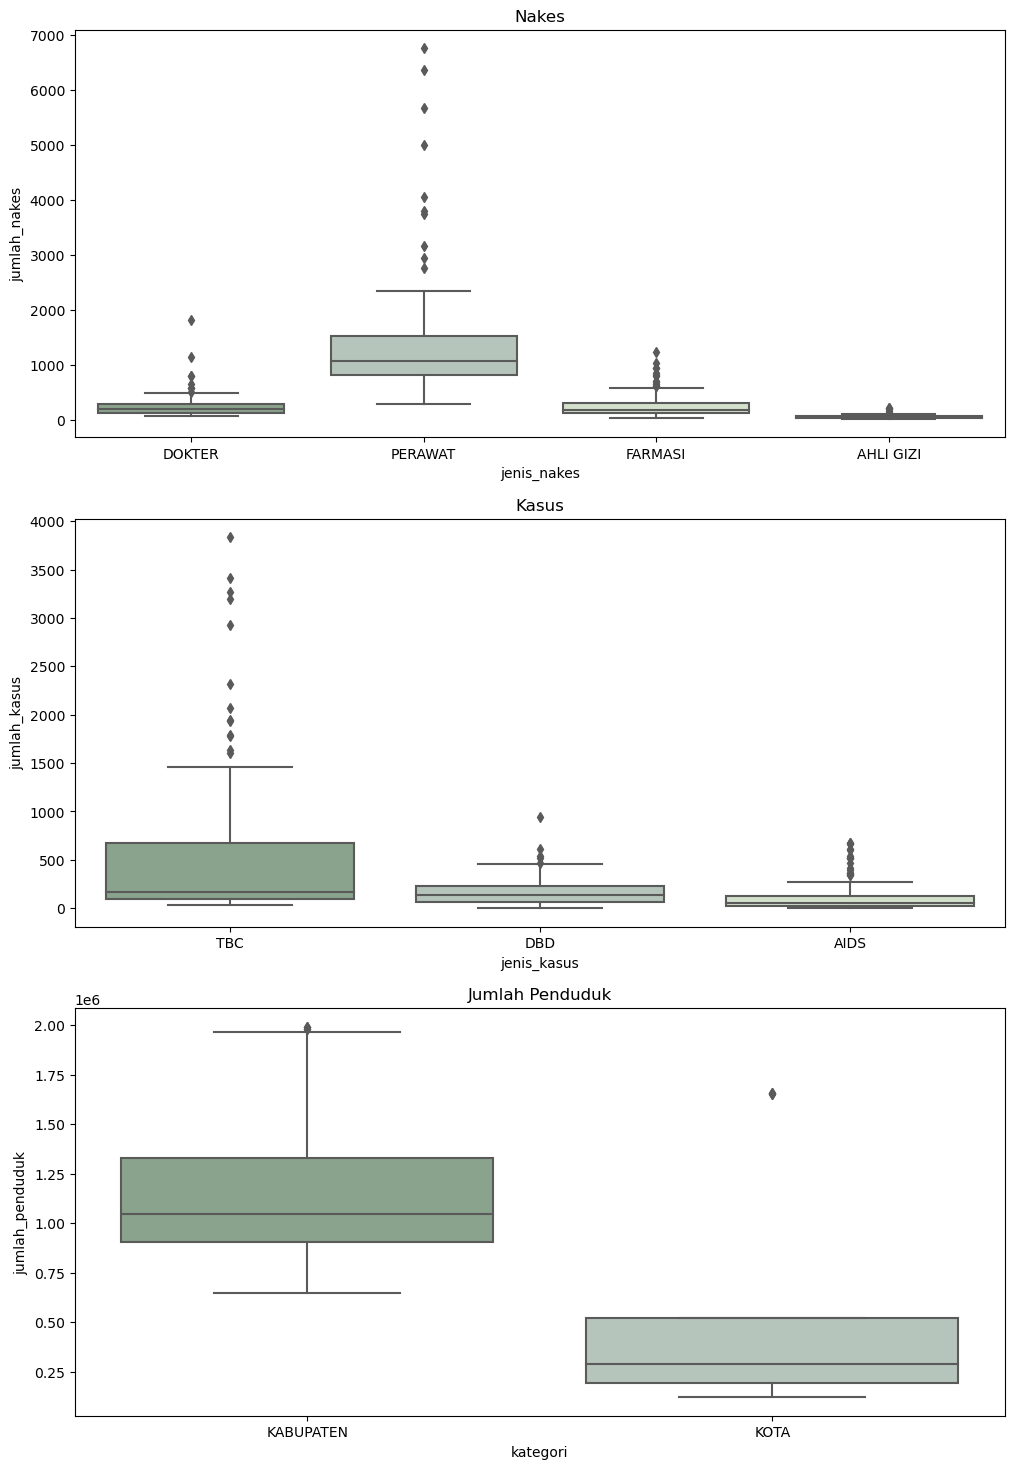

In [103]:
import seaborn as sns
green_palette = sns.color_palette(['#86A789', '#B2C8BA', '#D2E3C8'])

fig, axs = plt.subplots(3, 1, figsize=(12, 18))

# Boxplot untuk data 'nakes' 
sns.boxplot(x='jenis_nakes', y='jumlah_nakes', data=nakes, ax=axs[0], palette=green_palette)
axs[0].set_title('Nakes')

# Boxplot untuk data 'kasus' 
sns.boxplot(x='jenis_kasus', y='jumlah_kasus', data=kasus, ax=axs[1], palette=green_palette)
axs[1].set_title('Kasus')

# Boxplot untuk data 'penduduk'
sns.boxplot(x='kategori', y='jumlah_penduduk', data=penduduk, ax=axs[2], palette=green_palette)
axs[2].set_title('Jumlah Penduduk')

# Menampilkan plot
plt.show()


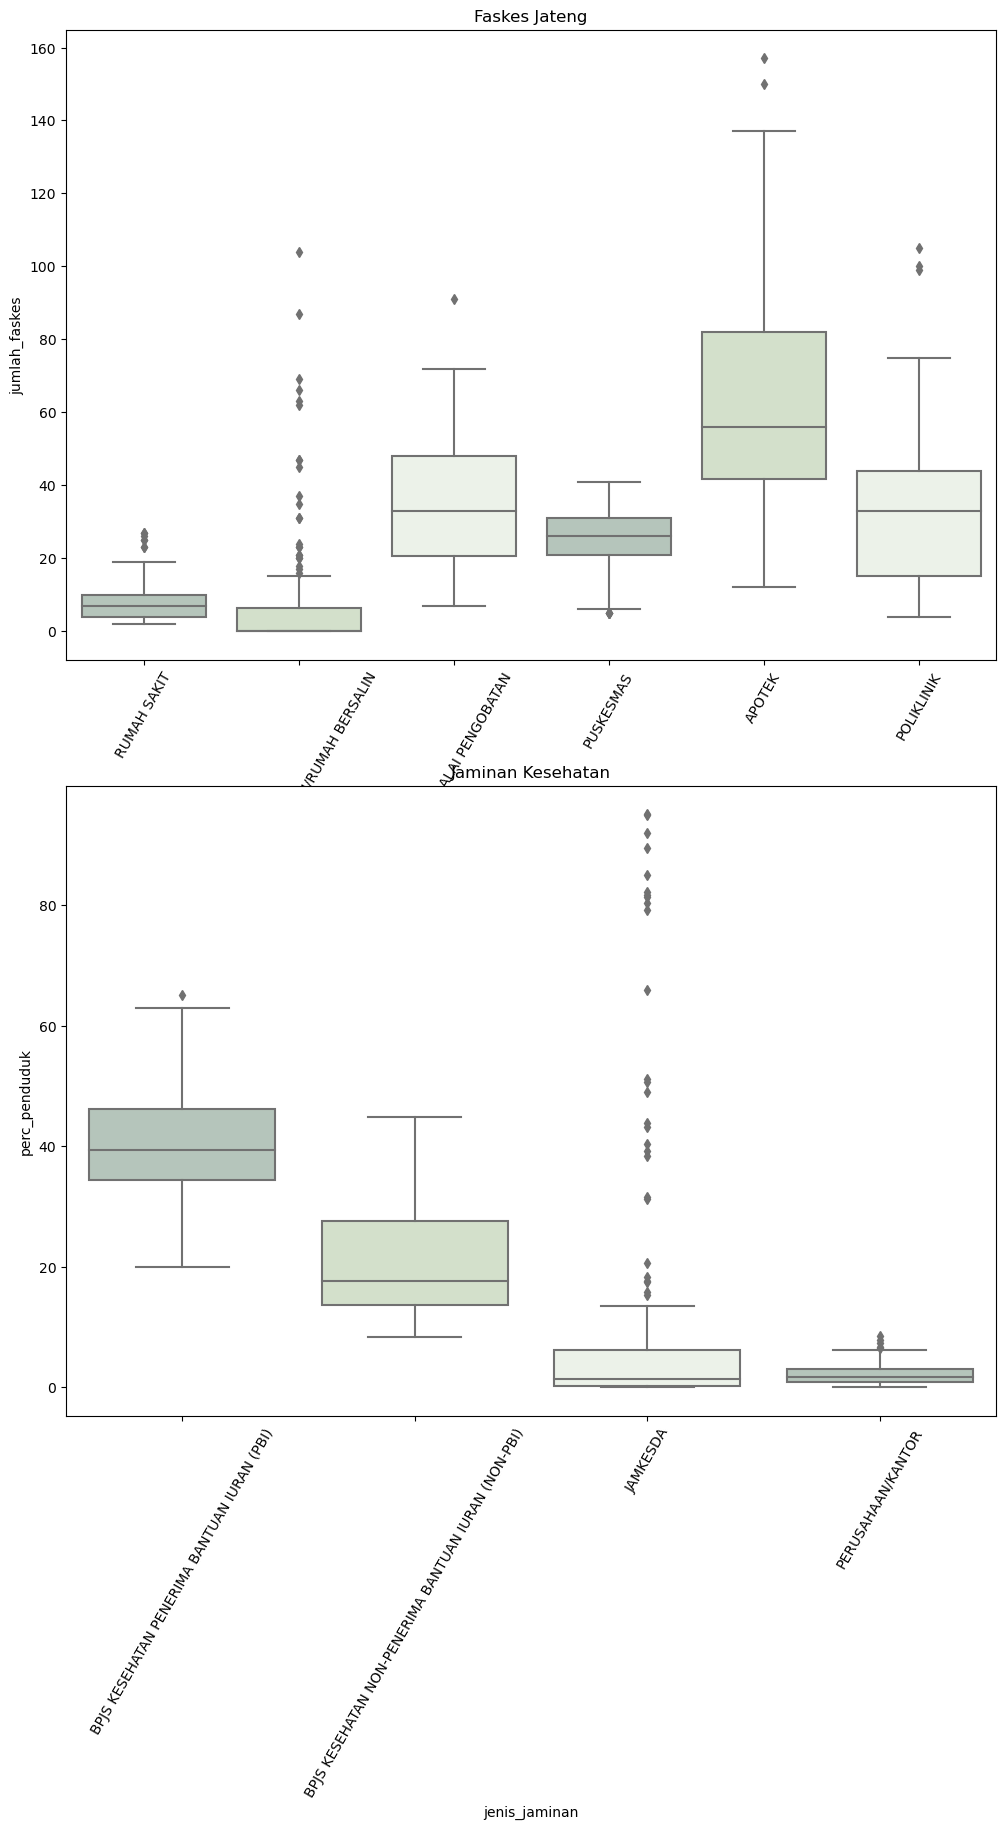

In [104]:
green_palette = sns.color_palette(['#B2C8BA', '#D2E3C8', '#EBF3E8'])

fig, axs = plt.subplots(2, 1, figsize=(12, 18))

sns.boxplot(x='jenis_faskes', y='jumlah_faskes', data=faskes, ax=axs[0], palette=green_palette)
axs[0].set_title('Faskes Jateng')
axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=60)

sns.boxplot(x='jenis_jaminan', y='perc_penduduk', data=df_jamkes, ax=axs[1], palette=green_palette)
axs[1].set_title('Jaminan Kesehatan')
axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=60)
plt.show()


In [74]:
# menghitung korelasi
column_faskes = 'jumlah_faskes'
column_nakes = 'jumlah_nakes'
column_jml_penduduk = 'jumlah_penduduk'
column_penduduk = 'perc_penduduk'
column_kasus = 'jumlah_kasus'

correlation_faskes_nakes = faskes[column_faskes].corr(nakes[column_nakes])
correlation_faskes_pengeluaran = faskes[column_faskes].corr(penduduk[column_jml_penduduk])
correlation_faskes_penduduk = faskes[column_faskes].corr(df_jamkes[column_penduduk])
correlation_nakes_pengeluaran = nakes[column_nakes].corr(penduduk[column_jml_penduduk])
correlation_nakes_penduduk = nakes[column_nakes].corr(df_jamkes[column_penduduk])
correlation_pengeluaran_penduduk = penduduk[column_jml_penduduk].corr(df_jamkes[column_penduduk])
correlation_kasus = kasus[column_kasus].corr(faskes[column_faskes])
correlation_kasus_penduduk = kasus[column_kasus].corr(penduduk['jumlah_penduduk'])
correlation_kasus_pengeluaran = kasus[column_kasus].corr(penduduk['jumlah_penduduk'])
correlation_kasus_nakes = kasus[column_kasus].corr(nakes['jumlah_nakes'])

print("\nCorrelation between Jumlah Faskes and Jumlah Nakes:")
print(correlation_faskes_nakes)

print("\nCorrelation between Jumlah Faskes and Jumlah Penduduk:")
print(correlation_faskes_pengeluaran)

print("\nCorrelation between Jumlah Faskes and Persentase Penduduk:")
print(correlation_faskes_penduduk)

print("\nCorrelation between Jumlah Nakes and Jumlah Penduduk:")
print(correlation_nakes_pengeluaran)

print("\nCorrelation between Jumlah Nakes and Persentase Penduduk:")
print(correlation_nakes_penduduk)

print("\nCorrelation between Jumlah Penduduk and Persentase Penduduk:")
print(correlation_pengeluaran_penduduk)

print("\nCorrelation between Jumlah Kasus and Jumlah Faskes:")
print(correlation_kasus)

print("\nCorrelation between Jumlah Kasus and Persentase Penduduk:")
print(correlation_kasus_penduduk)

print("\nCorrelation between Jumlah Kasus and Jumlah Penduduk:")
print(correlation_kasus_pengeluaran)

print("\nCorrelation between Jumlah Kasus and Jumlah Nakes:")
print(correlation_kasus_nakes)



Correlation between Jumlah Faskes and Jumlah Nakes:
-0.06362854548096193

Correlation between Jumlah Faskes and Jumlah Penduduk:
0.3785248420113484

Correlation between Jumlah Faskes and Persentase Penduduk:
-0.01016625616270183

Correlation between Jumlah Nakes and Jumlah Penduduk:
0.15750959580691062

Correlation between Jumlah Nakes and Persentase Penduduk:
0.15694943490953212

Correlation between Jumlah Penduduk and Persentase Penduduk:
-0.024908401663030887

Correlation between Jumlah Kasus and Jumlah Faskes:
-0.06012303574396163

Correlation between Jumlah Kasus and Persentase Penduduk:
0.12231916937283366

Correlation between Jumlah Kasus and Jumlah Penduduk:
0.12231916937283366

Correlation between Jumlah Kasus and Jumlah Nakes:
-0.010746716382761045


In [75]:
# menghitung statistika 
print("\nDescriptive Statistics for Faskes:")
print(faskes.describe())

print("\nDescriptive Statistics for Nakes:")
print(nakes.describe())

print("\nDescriptive Statistics for Jamkes:")
print(df_jamkes.describe())

print("\nDescriptive Statistics for Kasus:")
print(kasus.describe())

print("\nDescriptive Statistics for Pengeluaran:")
print(penduduk.describe())



Descriptive Statistics for Faskes:
       jumlah_faskes
count     700.000000
mean       27.798571
std        28.156232
min         0.000000
25%         6.000000
50%        21.000000
75%        40.000000
max       157.000000

Descriptive Statistics for Nakes:
       jumlah_nakes
count    560.000000
mean     481.085714
std      728.672690
min       22.000000
25%       91.750000
50%      192.000000
75%      697.750000
max     6752.000000

Descriptive Statistics for Jamkes:
       perc_penduduk
count     560.000000
mean       18.735446
std        19.473516
min         0.000000
25%         1.552500
50%        12.485000
75%        34.345000
max        95.080000

Descriptive Statistics for Kasus:
       jumlah_kasus
count    420.000000
mean     261.302381
std      475.486668
min        2.000000
25%       51.000000
50%      119.500000
75%      225.500000
max     3832.000000

Descriptive Statistics for Pengeluaran:
       jumlah_penduduk
count     1.400000e+02
mean      1.046551e+06
std       

In [76]:
total_nakes = nakes.groupby('tahun')['jumlah_nakes'].sum()
total_nakes.to_frame()

,jumlah_nakes
tahun,
2018,67335
2019,60532
2020,69340
2021,72201


In [77]:
total_kasus = kasus.groupby('tahun')['jumlah_kasus'].sum()
total_kasus.to_frame()

,jumlah_kasus
tahun,
2018,64509.0
2019,13228.0
2019,9776.0
2020,12162.0
2021,10072.0


# INTERPRETASI RUMUSAN MASALAH

## 1. Bagaimana perbandingan serta persebaran fasilitas kesehatan dan tenaga kesehatan di provinsi Jawa Tengah?
Jawab: persebaran fasilitas kesehatan dan tenaga kesehatan di jawa tengah masih belum merata, dan lebih terkonsentrasi di wilayah perkotaan terutama di kota-kota besar.  Untuk perbandingan fasilitas kesehatan dan tenaga kesehatan pada rentang tahun 2018-2021 secara keseluruhan terdapat pertambahan, dalam kategori fasilitas kesehatan yang terlihat mengalami penambahan yaitu apotek sedangkan pada kategori tenaga kesehatan yaitu perawat.
- Faktor geografis. Wilayah perkotaan memiliki jumlah penduduk yang lebih banyak dibandingkan dengan wilayah pedesaan. Hal ini menyebabkan kebutuhan akan fasilitas kesehatan dan tenaga kesehatan di wilayah perkotaan juga lebih tinggi.
- Faktor ekonomi. Wilayah perkotaan memiliki tingkat ekonomi yang lebih tinggi dibandingkan dengan wilayah pedesaan. Hal ini menyebabkan masyarakat di wilayah perkotaan lebih mampu untuk mengakses fasilitas kesehatan dan tenaga kesehatan.

## 2. Apakah jumlah kasus penyakit di provinsi jawa tengah sudah menurun?
Jawab: Dalam rentang tahun 2018 - 2021 penyakit TBC, AIDS, dan DBD rata-rata mengalami penurunan, namun pada kasus DBD terdapat kenaikan di tahun 2019.
- Bukti:
Dinas Kesehatan Provinsi Jawa Tengah juga mencatat penurunan jumlah kasus penyakit di Jawa Tengah dari tahun 2018 hingga 2021. Berdasarkan data dari Dinas Kesehatan Provinsi Jawa Tengah, jumlah kasus TBC di Jawa Tengah mengalami penurunan sebesar 2,7% dari tahun 2018 hingga 2021. Jumlah kasus AIDS di Jawa Tengah mengalami penurunan sebesar 14,4% dari tahun 2018 hingga 2021. Jumlah kasus DBD di Jawa Tengah mengalami penurunan sebesar 10,8% dari tahun 2018 hingga 2021. Penurunan jumlah kasus penyakit di Jawa Tengah ini menunjukkan bahwa upaya pemerintah dan masyarakat dalam meningkatkan kualitas layanan kesehatan dan mencegah penyebaran penyakit telah membuahkan hasil.

## 3. Apakah terdapat peningkatan penduduk yang memiliki jaminan kesehatan di setiap tahunnya?
Jawab: dari ke empat jaminan kesehatan yang selalu mengalami peningkatan setiap tahunnya yaitu BPJS PBI, hal ini menunjukan bahwa program BPJS kesehatan telah berhasil memberikan akses jaminan kesehatan yang lebih luas bagi masyarakat minskin dan rentan.
- Bukti:
Dinas Kesehatan Provinsi Jawa Tengah juga mencatat peningkatan jumlah penduduk yang memiliki jaminan kesehatan di Jawa Tengah dari tahun 2018 hingga 2021. Berdasarkan data dari Dinas Kesehatan Provinsi Jawa Tengah, jumlah penduduk yang memiliki BPJS Kesehatan di Jawa Tengah mengalami peningkatan sebesar 12,5% dari tahun 2018 hingga 2021. Peningkatan jumlah penduduk yang memiliki BPJS Kesehatan di Jawa Tengah ini menunjukkan bahwa program BPJS Kesehatan telah berhasil memberikan akses jaminan kesehatan yang lebih luas bagi masyarakat miskin dan rentan.

## 4. Bagaimana tingkat partisipasi dalam program jaminan kesehatan BPJS PBI di berbagai wilayah jawa tengah??
Jawab: dari 35 kabupaten/kota yang ada di Jawa Tengah hanya terdapat 5 daerah yang tingkat partisipasi masyarakatnya melebihi 50 persen yaitu daerah purbalingga, surakarta, kebumen, brebes, dan rembang, Untuk partisipasi paling tinggi ada pada kabupaten rembang dengan persentase sebesar 65,05% dari total penduduk.
Bukti:
Dinas Kesehatan Provinsi Jawa Tengah mencatat tingkat partisipasi dalam program jaminan kesehatan BPJS PBI di berbagai wilayah Jawa Tengah tahun 2021. Data tersebut, terlihat bahwa tingkat partisipasi program BPJS PBI di Jawa Tengah masih belum merata. Hanya terdapat 5 daerah yang tingkat partisipasi masyarakatnya melebihi 50 persen.


# SARAN & REKOMENDASI
- Pemerintah provinsi dapat bekerja sama dengan pemerintah kabupaten/kota untuk meningkatkan jumlah dan kualitas fasilitas kesehatan, terutama di wilayah-wilayah yang masih memiliki akses layanan kesehatan yang terbatas.
- Pemerintah provinsi dapat memberikan insentif bagi tenaga kesehatan yang bekerja di wilayah-wilayah yang masih memiliki akses layanan kesehatan yang terbatas.
- Pemerintah provinsi dapat mengembangkan program-program edukasi kesehatan yang efektif dan relevan dengan kebutuhan masyarakat.
